Importing required libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [29]:
df = pd.read_csv('ipl2024 Matches.csv')
df.head(1)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman


Checking the types, info and shape of dataset

In [30]:
print(df.dtypes)
print(df.info())
print(df.shape)

id                      int64
date                   object
team1                  object
team2                  object
toss_winner            object
decision               object
first_score             int64
first_wkts              int64
second_score            int64
second_wkts             int64
winner                 object
player_of_the_match    object
most_runs              object
most_wkts              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   74 non-null     int64 
 1   date                 74 non-null     object
 2   team1                74 non-null     object
 3   team2                74 non-null     object
 4   toss_winner          74 non-null     object
 5   decision             71 non-null     object
 6   first_score          74 non-null     int64 
 7   first_wkts       

Dropping irrelevent columns

In [31]:
df = df.drop(columns = ['player_of_the_match','most_wkts','most_runs'], axis =1)
df.head()

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat


Dropping the duplicate values

In [32]:
df_duplicate = df[df.duplicated()]
print(df_duplicate)

Empty DataFrame
Columns: [id, date, team1, team2, toss_winner, decision, first_score, first_wkts, second_score, second_wkts, winner]
Index: []


Here we donot have any duplicate values

Dropping the null values

In [33]:
print(df.isnull().sum())


id              0
date            0
team1           0
team2           0
toss_winner     0
decision        3
first_score     0
first_wkts      0
second_score    0
second_wkts     0
winner          0
dtype: int64


In [34]:
df = df.dropna()
print(df.isnull().sum())


id              0
date            0
team1           0
team2           0
toss_winner     0
decision        0
first_score     0
first_wkts      0
second_score    0
second_wkts     0
winner          0
dtype: int64


Data Cleaning is done

Detecting the outliers using boxplot

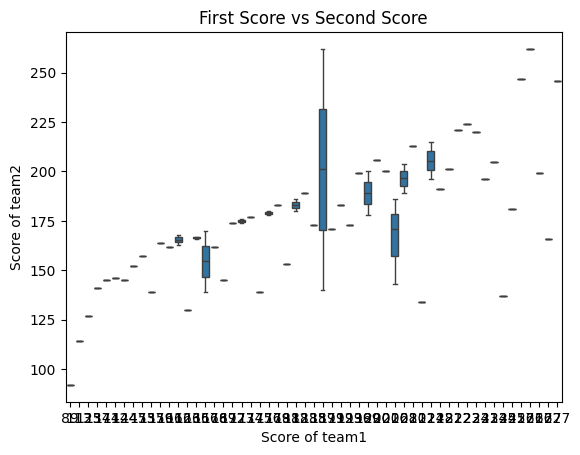

In [35]:
sns.boxplot(x='first_score', y='second_score', data=df)
plt.title('First Score vs Second Score')
plt.xlabel('Score of team1')
plt.ylabel('Score of team2')
plt.show()


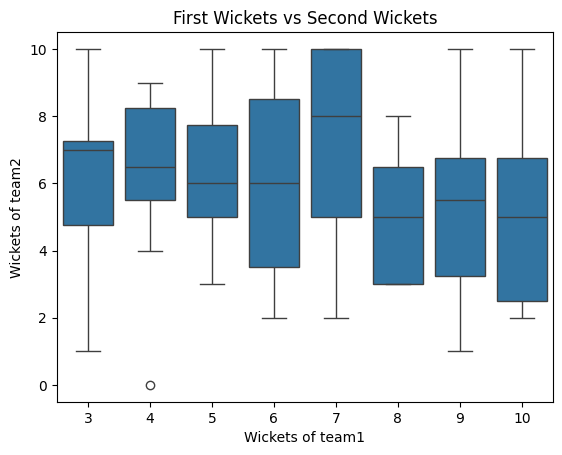

In [36]:
sns.boxplot(x='first_wkts', y='second_wkts', data=df)
plt.title('First Wickets vs Second Wickets')
plt.xlabel('Wickets of team1')
plt.ylabel('Wickets of team2')
plt.show()


Removing the outliers

In [37]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
print("IQR:\n", IQR)

IQR:
 id              35.0
first_score     44.0
first_wkts       3.0
second_score    47.0
second_wkts      4.0
dtype: float64


In [38]:
df = df[~((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]

Visulalizing the data using barplot

/tmp/ipykernel_5643/3489206609.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Match Winner')


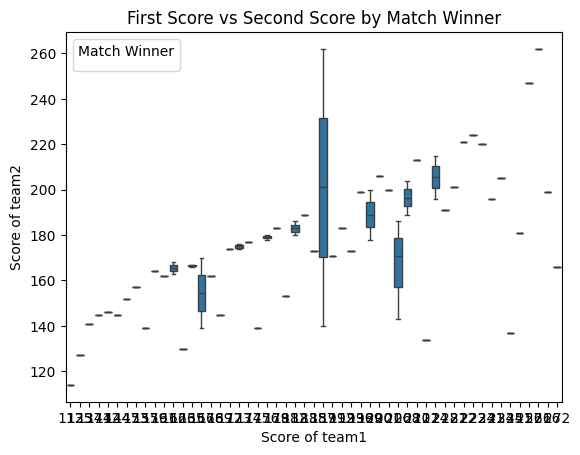

In [39]:
sns.boxplot(x='first_score', y='second_score', data=df,)
plt.title('First Score vs Second Score by Match Winner')
plt.xlabel('Score of team1')
plt.ylabel('Score of team2')
plt.legend(title='Match Winner')
plt.show()

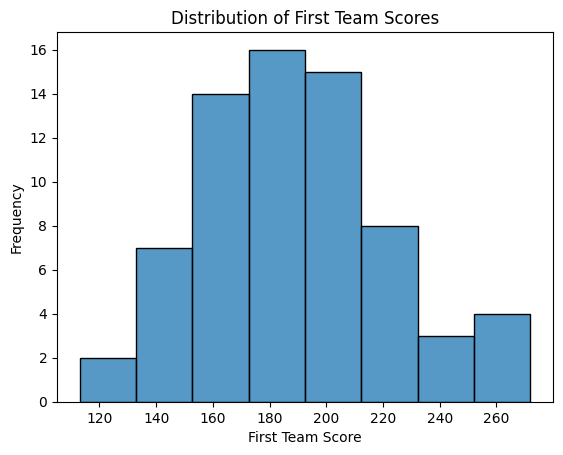

In [40]:
sns.histplot(data=df, x='first_score')
plt.title('Distribution of First Team Scores')
plt.xlabel('First Team Score')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap

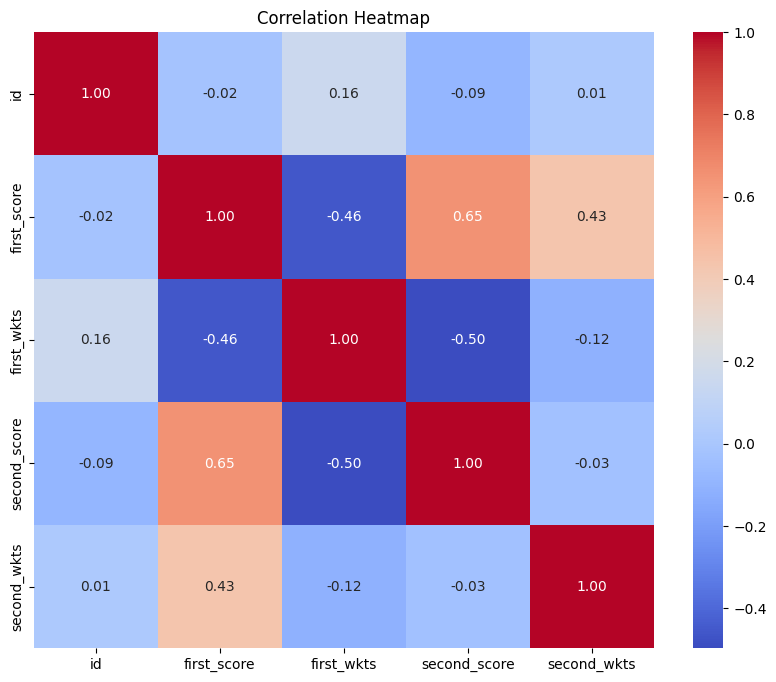

In [41]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PCA implementation

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))
X_scaled

array([[-1.70603843, -0.46008803, -0.19376351, -0.01327946, -0.75592631],
       [-1.65832191, -0.43008228,  1.23870242,  0.01944493, -0.02643099],
       [-1.61060539,  0.5901129 ,  0.28372513,  0.90300352,  0.33831667],
       [-1.56288887,  0.14002679, -1.14874079, -0.11145264, -0.02643099],
       [-1.51517236, -0.61011673, -0.19376351, -0.47142096,  1.06781198],
       [-1.46745584, -0.3700708 , -0.19376351,  0.05216932, -0.02643099],
       [-1.41973932,  0.53010142, -0.19376351, -1.09318441,  0.70306433],
       [-1.32430628, -0.10001914, -0.67125215, -0.11145264, -0.39117865],
       [-1.27658976, -0.19003636, -0.19376351,  0.31396446, -1.12067396],
       [-1.22887324,  0.32006123,  0.76121378,  0.05216932, -0.39117865],
       [-1.18115672, -0.79015117,  0.76121378, -0.2750746 , -1.12067396],
       [-1.13344021,  0.08001531, -0.67125215, -0.17690142, -0.02643099],
       [-1.08572369, -1.90036358,  1.23870242, -1.61677469, -0.75592631],
       [-1.03800717, -0.2200421 , -0.6

In [44]:
X = df.drop('second_score', axis =1)
y = df['second_score']
X

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_wkts,winner
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,4,Chennai
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,6,Punjab
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,7,Kolkata
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,6,Rajasthan
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,9,Gujarat
...,...,...,...,...,...,...,...,...,...,...
68,69,"May 19,2024",Punjab,Hyderabad,Punjab,Bat,214,5,6,Hyderabad
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,2,Kolkata
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,6,Rajasthan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,7,Hyderabad


In [45]:
y


0     176
1     177
2     204
3     173
4     162
     ... 
68    215
70    164
71    174
72    139
73    114
Name: second_score, Length: 69, dtype: int64

Applying PCA into our Data Model

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.78149811e-01, -1.61239950e+00],
       [-6.89037538e-01, -7.31298864e-01],
       [ 9.82102645e-01, -6.56949223e-01],
       [ 7.82803282e-01, -1.05144867e+00],
       [-7.65526699e-02, -8.44727979e-02],
       [ 7.03328740e-02, -9.47048932e-01],
       [ 1.61309613e-01,  1.30056555e-01],
       [ 2.74974131e-01, -1.13900275e+00],
       [ 2.03932634e-02, -1.67623532e+00],
       [-1.21810227e-01, -7.12483657e-01],
       [-1.16017270e+00, -1.38934864e+00],
       [ 4.17852491e-01, -7.10409527e-01],
       [-2.72516427e+00, -8.57101911e-01],
       [ 2.75372215e-01,  4.99888287e-01],
       [ 1.65743478e+00,  1.25543943e+00],
       [ 1.39741863e+00, -6.49517802e-01],
       [-3.54780069e-01, -1.25329199e+00],
       [ 8.63000392e-01, -1.52166758e+00],
       [ 1.95158208e+00, -1.46370950e-05],
       [-4.96417925e-01,  7.31645833e-01],
       [-2.39498900e+00, -9.61036784e-01],
       [-6.08447461e-01, -1.66703479e-01],
       [ 1.52880423e+00, -5.90458933e-01],
       [-6.

Splitting the model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51, 2)
(51,)
(18, 2)
(18,)


Train the model

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


array([199, 174, 199, 162, 262, 199, 145, 199, 145, 145, 196, 162, 145,
       145, 199, 199, 174, 199])

Accuracy

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.16666666666666666